# Reconnaissance faciale

In [1]:
import cv2
from PIL import Image
import face_recognition

/var/www/html/cours/brief17-appli_chat/venv_facial_rec/lib/python3.12/site-packages/face_recognition_models/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [3]:
try: 
    visage_connu = face_recognition.load_image_file(f"image/emma_1.jpg")
    visage_a_reconnaitre = face_recognition.load_image_file(f"image/emma_2.jpg")
except FileNotFoundError as e:
    print(f"Erreur : {e}. Veuillez v√©rifier que les fichiers existent et que les chemins sont corrects.")
    visage_connu = None
    visage_a_reconnaitre = None

print("visage connu:", visage_connu)
print("taille visage connu:", visage_connu.shape if visage_connu is not None else "N/A")

visage connu: [[[220 221 223]
  [220 221 223]
  [220 221 223]
  ...
  [207 208 210]
  [207 208 210]
  [207 208 210]]

 [[220 221 223]
  [220 221 223]
  [220 221 223]
  ...
  [207 208 210]
  [207 208 210]
  [207 208 210]]

 [[220 221 223]
  [220 221 223]
  [220 221 223]
  ...
  [207 208 210]
  [207 208 210]
  [207 208 210]]

 ...

 [[ 41  40  46]
  [ 40  39  45]
  [ 39  38  44]
  ...
  [ 27  25  28]
  [ 26  24  27]
  [ 25  23  26]]

 [[ 41  40  46]
  [ 41  40  46]
  [ 40  39  45]
  ...
  [ 27  25  28]
  [ 27  25  28]
  [ 26  24  27]]

 [[ 42  41  47]
  [ 41  40  46]
  [ 40  39  45]
  ...
  [ 28  26  29]
  [ 27  25  28]
  [ 26  24  27]]]
taille visage connu: (1102, 735, 3)


## Version simple
Comparaison avec face_recognition

In [14]:
try:
    encodage_visage_connu = face_recognition.face_encodings(visage_connu)[0]
    encodage_visage_a_reconnaitre = face_recognition.face_encodings(visage_a_reconnaitre)[0]
except IndexError:
    print("Aucun visage d√©tect√© dans l'une des images.")
    encodage_visage_connu = None
    encodage_visage_a_reconnaitre = None

if encodage_visage_connu is not None and encodage_visage_a_reconnaitre is not None:
    resultats = face_recognition.compare_faces([encodage_visage_connu], encodage_visage_a_reconnaitre, tolerance=0.6)
    # La 'tolerance' (tol√©rance) est un seuil de distance. Plus elle est faible, plus la correspondance doit √™tre pr√©cise.

print(f"La comparaison a donn√© le r√©sultat : {resultats[0]}")

if resultats[0]:
    print("Le visage a √©t√© reconnu avec succ√®s ! C'est la m√™me personne.")
else:
    print("Le visage n'a pas √©t√© reconnu. Ce n'est pas la m√™me personne.")

La comparaison a donn√© le r√©sultat : True
Le visage a √©t√© reconnu avec succ√®s ! C'est la m√™me personne.


## Version plus compliqu√©e
Avec crop OpenCV

‚úÖ Encodages des visages cr√©√©s avec succ√®s.

üéâ R√©sultat : VRAI. Les visages correspondent ! C'est la m√™me personne.


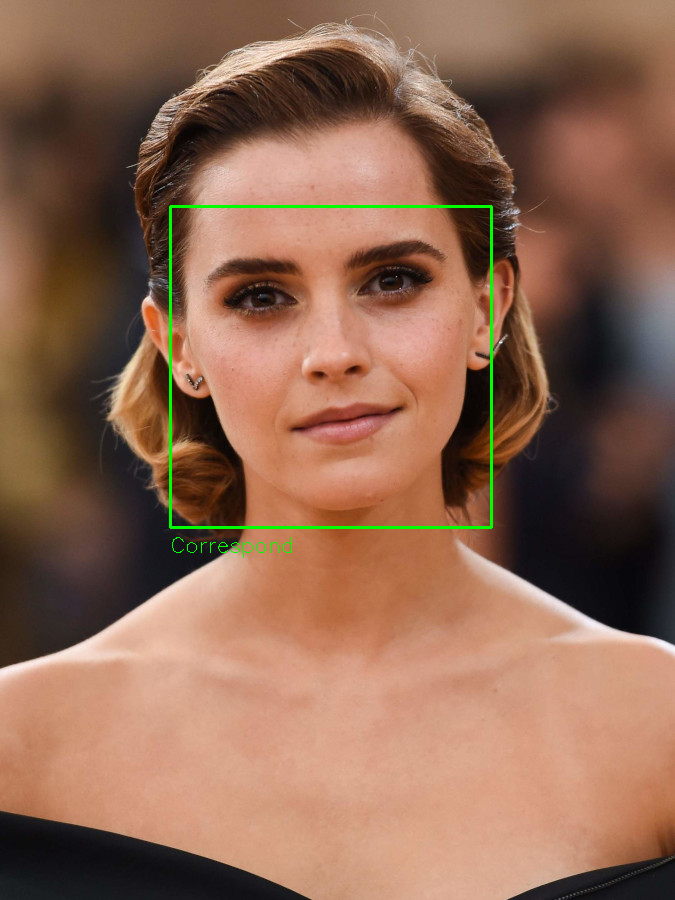

In [15]:
if visage_connu is not None and visage_a_reconnaitre is not None:
    try:
        encodage_visage_connu = face_recognition.face_encodings(visage_connu)[0]
        encodage_visage_a_reconnaitre = face_recognition.face_encodings(visage_a_reconnaitre)[0]

        print("‚úÖ Encodages des visages cr√©√©s avec succ√®s.")
        resultats = face_recognition.compare_faces([encodage_visage_connu], encodage_visage_a_reconnaitre, tolerance=0.6)
        
        if resultats[0]:
            print("\nüéâ R√©sultat : VRAI. Les visages correspondent ! C'est la m√™me personne.")
        else:
            print("\n‚ùå R√©sultat : FAUX. Les visages ne correspondent pas.")

        # Afficher visuellement le r√©sultat
        # Convertir l'image au format BGR (Blue, Green, Red - format par d√©faut de la biblioth√®que OpenCV)
        visage_a_reconnaitre_bgr = cv2.cvtColor(visage_a_reconnaitre, cv2.COLOR_RGB2BGR)   

        #  Dessiner une bounding box autour du visage d√©tect√©   
        locations = face = face_recognition.face_locations(visage_a_reconnaitre)
        if locations:
            top, right, bottom, left = locations[0]
            couleur = (0, 255, 0) if resultats[0] else (0, 0, 255) # Vert si match, Rouge sinon
            cv2.rectangle(visage_a_reconnaitre_bgr, (left, top), (right, bottom), couleur, 2)
            texte = "Correspond" if resultats[0] else "No Match"
            cv2.putText(visage_a_reconnaitre_bgr, texte, (left, bottom + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, couleur, 1)

        # Afficher l'image dans une fen√™tre
        image_pil = Image.fromarray(cv2.cvtColor(visage_a_reconnaitre_bgr, cv2.COLOR_BGR2RGB))
        display(image_pil)

    except IndexError:
        print("\n‚ö†Ô∏è Erreur : Aucun visage n'a √©t√© d√©tect√© dans l'une des images. V√©rifiez les fichiers.")


## Int√©gration de la cam√©ra

In [ ]:
try:
    encodage_connu = face_recognition.face_encodings(visage_connu)[0]
except IndexError:
    print("Erreur : aucun visage d√©tect√© dans l'image de r√©f√©rence.")
    exit()

# Cr√©er un tableau pour stocker les encodages connus et leurs noms
encodages_connus = [encodage_connu]
noms_connus = ["Nom de la personne"]

cap = cv2.VideoCapture(0)  # Utiliser la cam√©ra par d√©faut (0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur lors de la capture de la vid√©o.")
        break

        # Redimensionner le cadre pour une performance plus rapide
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    
    # Convertir de BGR en RGB
    frame_rgb = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

    # D√©tecter les visages dans le flux vid√©o
    face_locations = face_recognition.face_locations(frame_rgb)
    face_encodings = face_recognition.face_encodings(frame_rgb, face_locations)

    for (top, right, bottom, left), encodage_visage in zip(face_locations, face_encodings):
        nom = "Inconnu"
        couleur = (0, 0, 255) # Rouge par d√©faut

        # Comparer le visage de la cam√©ra avec les encodages connus
        correspondances = face_recognition.compare_faces(encodages_connus, encodage_visage)

        if True in correspondances:
            index_correspondance = correspondances.index(True)
            nom = noms_connus[index_correspondance]
            couleur = (0, 255, 0) # Vert si reconnu

        # Dessiner le rectangle et le nom sur l'image
        cv2.rectangle(frame, (left, top), (right, bottom), couleur, 2)
        cv2.putText(frame, nom, (left, bottom + 25), cv2.FONT_HERSHEY_DUPLEX, 0.7, couleur, 1)

    # Afficher le flux vid√©o
    cv2.imshow('Reconnaissance faciale en direct', frame)
    
    # Sortir de la boucle si la touche 'q' est press√©e
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Lib√©rer la cam√©ra et fermer toutes les fen√™tres
cap.release()
cv2.destroyAllWindows()

Erreur lors de la capture de la vid√©o.


[ WARN:0@2695.650] global cap_v4l.cpp:914 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@2695.650] global obsensor_uvc_stream_channel.cpp:163 getStreamChannelGroup Camera index out of range


### L'int√©gration de la cam√©ra ne fonctionne pas sous wsl - probl√®mes de permissions, √† voir dans la v√©ritable appli

### 1- S√©lection de la technologie

Pour r√©pondre aux contraintes du client (pas d'API tierce, code Python, Docker), la solution la plus pertinente est l'utilisation des biblioth√®ques dlib et face_recognition, compl√©t√©es par OpenCV pour la gestion de la cam√©ra et des images, et par un framework web comme Flask ou FastAPI pour l'API.

### 2 - Quelles en sont les fonctionnalit√©s

- D√©tection faciale : Localise les visages dans une image ou un flux vid√©o et renvoie leurs coordonn√©es.
- Extraction de caract√©ristiques : Convertit un visage en un vecteur de 128 dimensions (un "face embedding") qui repr√©sente ses caract√©ristiques uniques.
- V√©rification (1:1) : Compare deux encodages faciaux pour d√©terminer s'ils appartiennent √† la m√™me personne. C'est la base de l'authentification.
- Identification (1:N) : Compare un encodage √† un ensemble d'encodages d√©j√† enregistr√©s pour trouver une correspondance.
- D√©tection des points de rep√®re faciaux (landmarks) : Identifie des points cl√©s sur le visage (yeux, nez, bouche) pour l'alignement.

### 3 - Les entr√©es et les sorties

- Entr√©es : L'API recevra des donn√©es d'image. Pour l'authentification en direct, l'entr√©e sera un flux vid√©o ou une image captur√©e par une webcam. Dans le cadre d'une API web, cela pourrait √™tre une image encod√©e en base64.

- Sorties : La sortie de l'API sera une r√©ponse JSON. Elle contiendra g√©n√©ralement un statut (succ√®s/√©chec) et des informations sur la reconnaissance. Pour une v√©rification simple, la sortie peut √™tre un bool√©en (true/false). Pour une identification, la sortie serait l'identit√© de la personne reconnue ou null si aucune correspondance n'est trouv√©e.<br/>
Exemple de sortie pour la v√©rification : {"status": "success", "match": true}<br/>
Exemple de sortie pour l'identification : {"status": "success", "user_id": "123", "confidence": 0.85}

### 3. Cette technologie est-elle suffisante seule pour remplir le cahier des charges ?
Non, elle n'est pas suffisante seule. Bien que le c≈ìur de la reconnaissance faciale soit couvert par dlib et face_recognition, le cahier des charges impose de rendre le service disponible via une API et de l'int√©grer dans une application Docker.

La technologie choisie doit √™tre int√©gr√©e dans un √©cosyst√®me qui inclut :
- Un framework web (Flask/FastAPI) pour cr√©er l'API REST.
- Docker pour conteneuriser l'application, ce qui permet de l'ex√©cuter de mani√®re coh√©rente sur les serveurs du client. Le Dockerfile devra inclure toutes les d√©pendances n√©cessaires (cmake, dlib, OpenCV, etc.).
- Une base de donn√©es pour stocker les encodages faciaux des utilisateurs. Un simple dictionnaire peut faire l'affaire pour un prototype, mais une base de donn√©es SQL (PostgreSQL) serait n√©cessaire pour un syst√®me en production.
- Un m√©canisme de d√©tection de la vie (liveness detection) pour emp√™cher les tentatives d'usurpation d'identit√© avec des photos ou des vid√©os. Ce n'est pas une fonctionnalit√© standard de face_recognition et n√©cessite une impl√©mentation suppl√©mentaire.